In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.fftpack import ifft
from tqdm import tqdm

In [51]:
input_frame = pd.read_csv("E1-3.2.csv")
# xi = x / (lambda * z)
input_frame["xi"]=input_frame["x"]/0.25
input_frame

,x,Amplitude,xi
0,-400000.000000,0.006700,-1.600000e+06
1,-399919.991999,0.006659,-1.599680e+06
2,-399839.983998,0.006619,-1.599360e+06
3,-399759.975998,0.006578,-1.599040e+06
4,-399679.967997,0.006538,-1.598720e+06
...,...,...,...
9995,399679.967997,0.006538,1.598720e+06
9996,399759.975998,0.006578,1.599040e+06
9997,399839.983998,0.006619,1.599360e+06
9998,399919.991999,0.006659,1.599680e+06


In [52]:
# Poor man's ift
def my_ift(x):
    return np.sum(input_frame["Amplitude"]*np.exp(2*np.pi*1j*x*input_frame["xi"]))

In [53]:
xprime = np.linspace(-5e-6,5e-6,2001)
A_re = np.array([])
A_im = np.array([])

In [54]:
for x in tqdm(xprime):
    A_re = np.append(A_re, my_ift(x).real)
    A_im = np.append(A_im, my_ift(x).imag)

100%|██████████| 2001/2001 [00:06<00:00, 325.47it/s]


In [55]:
A_im /= A_re.max()
A_re /= A_re.max()

In [56]:
aperture = pd.DataFrame(np.stack((xprime, A_re, A_im), axis = 1), columns=["xprime", "A_re", "A_im"])
aperture

,xprime,A_re,A_im
0,-0.000005,0.000647,1.790077e-12
1,-0.000005,0.000605,1.763807e-12
2,-0.000005,0.000561,1.734573e-12
3,-0.000005,0.000516,1.702430e-12
4,-0.000005,0.000470,1.667469e-12
...,...,...,...
1996,0.000005,0.000470,-1.667469e-12
1997,0.000005,0.000516,-1.702420e-12
1998,0.000005,0.000561,-1.734573e-12
1999,0.000005,0.000605,-1.763846e-12


In [57]:
aperture_sorted = aperture.sort_values('A_re', ascending = False)
# aperture_sorted_im = aperture.sort_values('A_im', ascending = False)

In [58]:
aperture_sorted.head(20)

,xprime,A_re,A_im
1000,0.000000e+00,1.000000,0.000000e+00
1001,5.000000e-09,0.999937,2.669482e-14
999,-5.000000e-09,0.999937,-2.669482e-14
998,-1.000000e-08,0.999749,-5.341143e-14
1002,1.000000e-08,0.999749,5.341143e-14
1003,1.500000e-08,0.999435,8.016879e-14
997,-1.500000e-08,0.999435,-8.016946e-14
996,-2.000000e-08,0.998995,-1.069905e-13
1004,2.000000e-08,0.998995,1.069919e-13
1005,2.500000e-08,0.998432,1.338988e-13


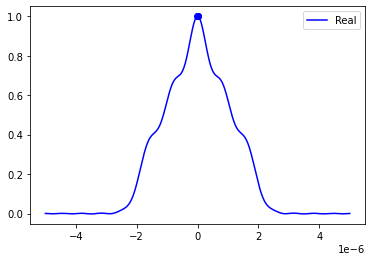

In [59]:
plt.plot(xprime,A_re,color="blue", label="Real")
#plt.plot(xprime,A_im,color="red", label="Imaginary")
plt.scatter(aperture_sorted.head(3)["xprime"], aperture_sorted.head(3)["A_re"], marker="o", color="blue")
plt.legend()
plt.show()